##### Comparing Random Forest & Decision Tree

#### IMPORT LIBRARIES

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### LOAD DATATSET

In [8]:
# Step 1 : Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
url

'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [9]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [10]:
df = pd.read_csv(url, names=columns)

#### SPLIT FEATURES AND TARGET

In [11]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

#### TRAIN/TEST SPLIT DATA

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### TRAIN RANDOM FOREST

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 #### TRAIN DECISION TREE

In [14]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#### COMPARE ACCURACY

In [15]:
print("Decision Tree - Training Accuracy:", dt_clf.score(X_train, y_train))
print("Decision Tree - Testing Accuracy:", dt_clf.score(X_test, y_test))

print("Random Forest - Training Accuracy:", rf_clf.score(X_train, y_train))
print("Random Forest - Testing Accuracy:", rf_clf.score(X_test, y_test))

Decision Tree - Training Accuracy: 0.7752442996742671
Decision Tree - Testing Accuracy: 0.7662337662337663
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.7207792207792207


#### FEATURE IMPORTANCE FOR RANDOM FOREST

In [17]:
importances = rf_clf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

#### PLOT FEATURE IMPORTANCE

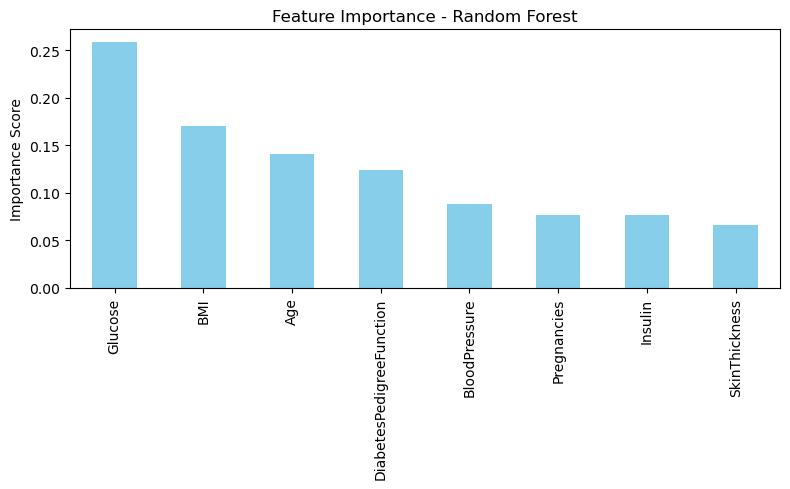

In [18]:
plt.figure(figsize=(8, 5))
feat_importance.plot(kind='bar', color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()